# Ch04 Dados Ausentes

maneiras de lidar com dados ausentes

- remover qualquer linha com dados ausentes;
- remover qualquer coluna com dados ausentes;
- imputar dados aos valores ausentes; 
- criar uma coluna para informar que os dados estavam ausentes.



# Bibliotecas basicas, importação de base

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [98]:
df = pd.read_excel("titanic3.xls")

In [99]:
orig_df = df

In [4]:
df.isnull().mean()*100 # Retorna o percentual de dados ausentes

pclass        0.000000
survived      0.000000
name          0.000000
sex           0.000000
age          20.091673
sibsp         0.000000
parch         0.000000
ticket        0.000000
fare          0.076394
cabin        77.463713
embarked      0.152788
boat         62.872422
body         90.756303
home.dest    43.086325
dtype: float64

## Analisando os dados ausentes

In [5]:
import missingno as msno

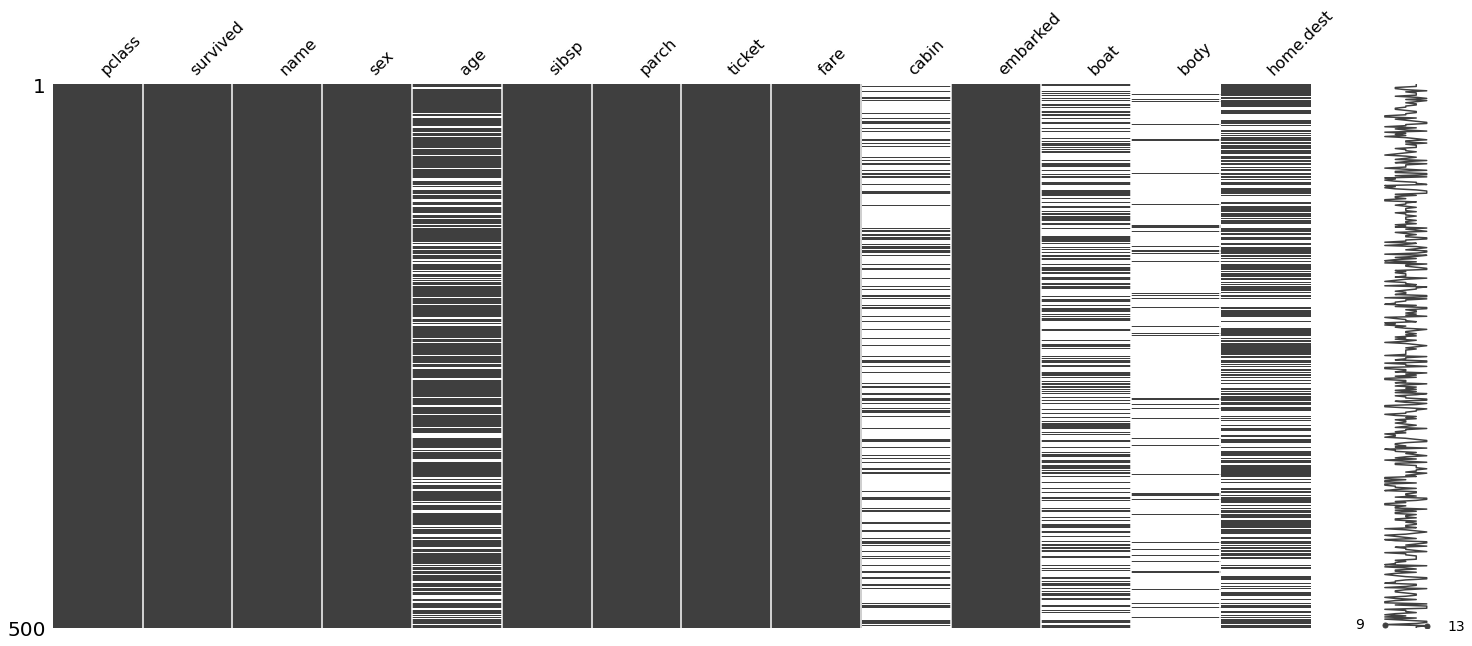

In [6]:
ax = msno.matrix(orig_df.sample(500)) # analisa somente 500 registros
ax.get_figure().savefig("mlpr_0401.png") # gera uma imagem do gráfico

Gráfcio com contadores de dados ausentes

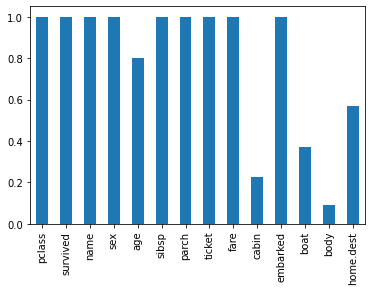

In [28]:
fig, ax = plt.subplots(figsize=(6, 4))
(1 - df.isnull().mean()).abs().plot.bar(ax=ax) # retorna o percentual de dados não ausentes
fig.savefig("mlpr04_02.png", dpi=300)

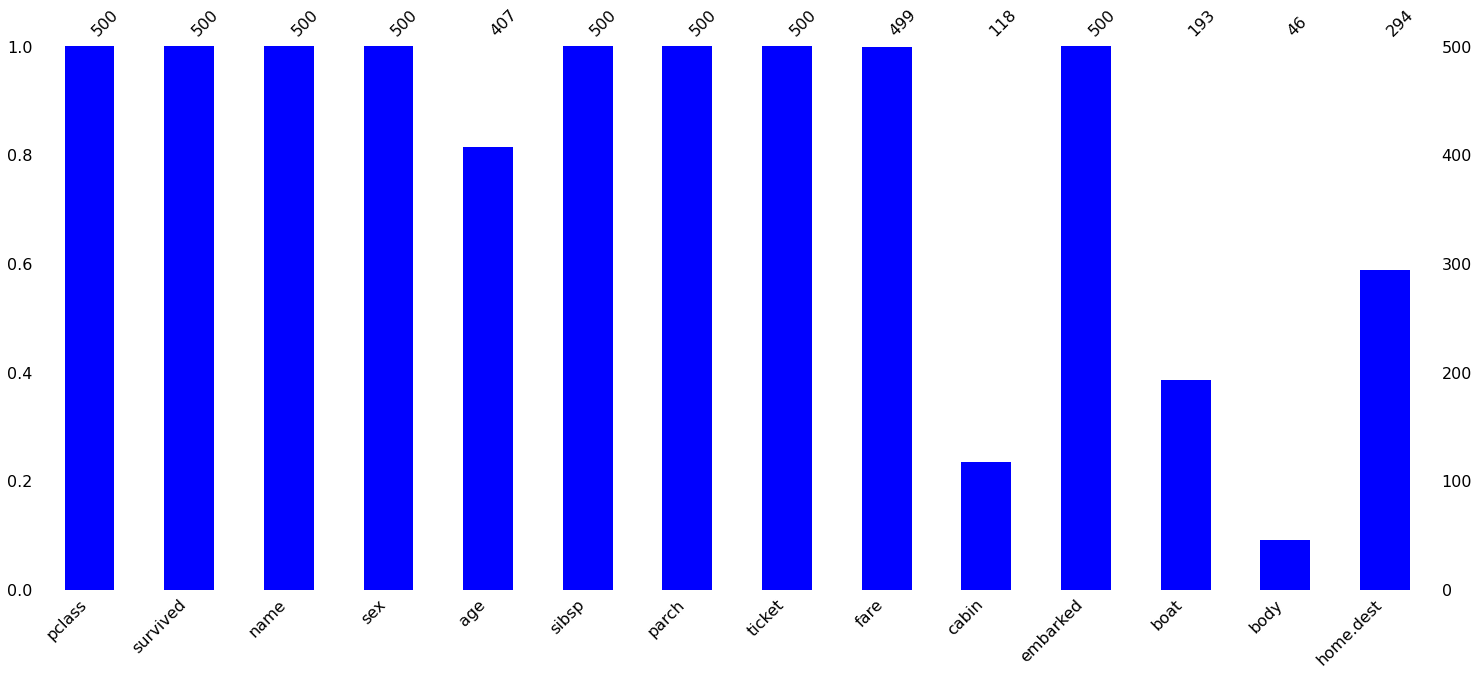

In [100]:
#gerando o mesmo gráfico com a biblioteca missingno
ax = msno.bar(orig_df.sample(500), color='blue') # retorna o percentual de dados não ausentes
ax.get_figure().savefig("mlpr04_03.png")

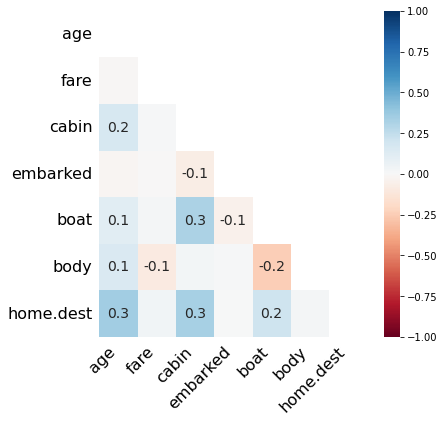

In [38]:
ax = msno.heatmap(df, figsize=(6, 6))
ax.get_figure().savefig("mlpr04_04.png")

## Verifcando a correlação entre dados ausentes

ax = msno.heatmap(df, figsize=(6,6))
ax.get_figure().savefig("mlpr04_04.png")

### Dendrograma de dados ausentes gerado com o missingno. 
Podemos ver as colunas que não têm dados ausentes na parte superior à direita.

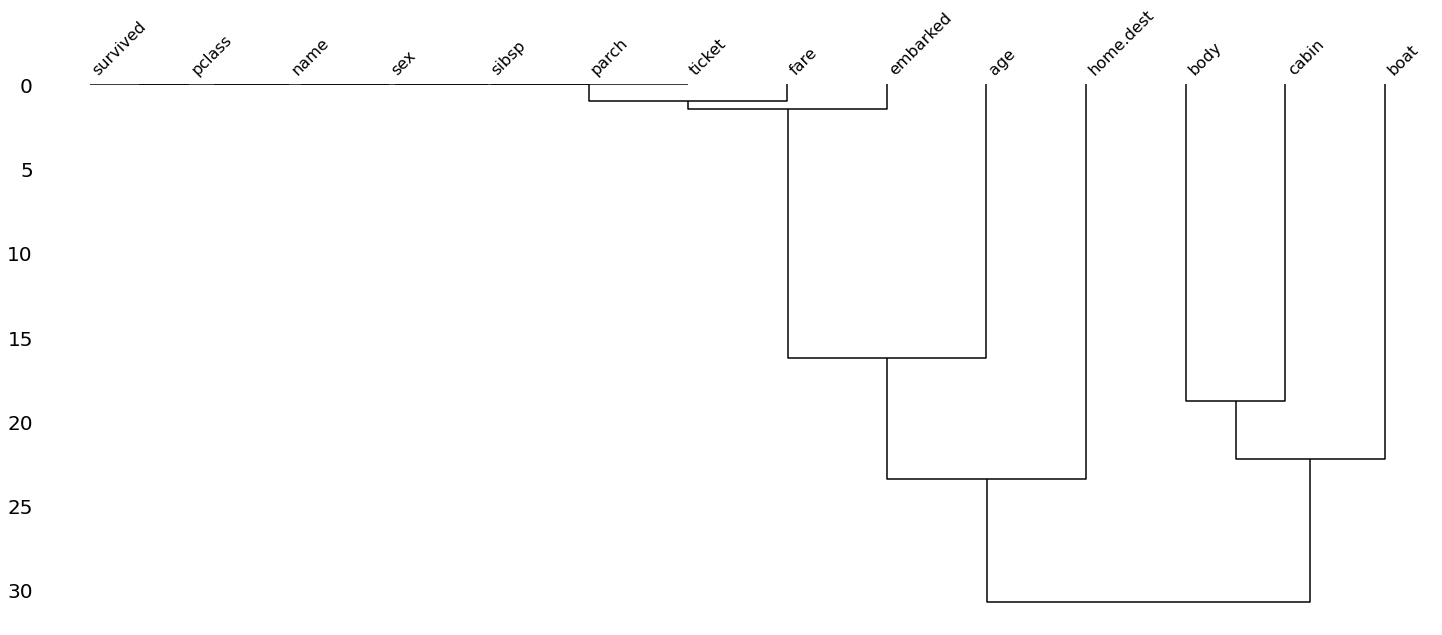

In [39]:
ax = msno.dendrogram(df)
ax.get_figure().savefig("mlpr04_05.png")

## Descartando dados usentes

In [58]:
### Descartando todas as linhas
df1 = df.dropna()

In [49]:
df.shape , df1.shape

((1309, 14), (0, 14))

In [50]:
### Descartando colunas
### é possivel passar a lista de nomes de colunas a serem deletadas

In [60]:
df1 = df.drop(columns="cabin")

In [61]:
df.shape , df1.shape

((1309, 14), (1309, 13))

In [62]:
df1 = df.dropna(axis=1)

In [63]:
df1

,pclass,survived,name,sex,sibsp,parch,ticket
0,1,1,"Allen, Miss. Elisabeth Walton",female,0,0,24160
1,1,1,"Allison, Master. Hudson Trevor",male,1,2,113781
2,1,0,"Allison, Miss. Helen Loraine",female,1,2,113781
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,1,2,113781
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,1,2,113781
...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,1,0,2665
1305,3,0,"Zabour, Miss. Thamine",female,1,0,2665
1306,3,0,"Zakarian, Mr. Mapriededer",male,0,0,2656
1307,3,0,"Zakarian, Mr. Ortin",male,0,0,2670


## Imputando dados

scikit-lear - ```SimpleImputer``` 
Trabalha com a média mediana e com os valores mais frequentes

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [119]:
from sklearn.impute import SimpleImputer

In [120]:
num_cols = df.select_dtypes(include="number").columns

In [121]:
imput = SimpleImputer() # média (default) 
                        # parametro strategy: 
                            # 'median' (mediana) 
                            # 'most_frequent' mais frequente
                            # 'constant' um numero constante ex: 01- junto com 'fill_value= -1'
imputed = imput.fit_transform(df[num_cols])

In [123]:
df.loc[:, num_cols] = imputed

In [124]:
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age             0
sibsp           0
parch           0
ticket          0
fare            0
cabin        1014
embarked        2
boat          823
body            0
home.dest     564
dtype: int64

## Acrescentando colunas informativas

In [125]:
# a coluna informará que uma dado estava ausente

In [128]:
def add_indicador(col):
    def wrapper(df):
        return df[col].isna().astype(int)
    
    return wrapper        

In [129]:
df1 = df.assign(cabin_missng=add_indicador("cabin"))

In [131]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   pclass        1309 non-null   float64
 1   survived      1309 non-null   float64
 2   name          1309 non-null   object 
 3   sex           1309 non-null   object 
 4   age           1309 non-null   float64
 5   sibsp         1309 non-null   float64
 6   parch         1309 non-null   float64
 7   ticket        1309 non-null   object 
 8   fare          1309 non-null   float64
 9   cabin         295 non-null    object 
 10  embarked      1307 non-null   object 
 11  boat          486 non-null    object 
 12  body          1309 non-null   float64
 13  home.dest     745 non-null    object 
 14  cabin_missng  1309 non-null   int32  
dtypes: float64(7), int32(1), object(7)
memory usage: 148.4+ KB
